In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import LabelEncoder

from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols

from sklearn.svm import SVC # Maquinas de soporte vectorial
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost
from sklearn.linear_model import LogisticRegression # Regresión logística
from sklearn.tree import DecisionTreeClassifier # Arboles de decision
from sklearn.ensemble import RandomForestClassifier # Random Forest


In [3]:
pd.set_option("display.max_columns", None)  # Muestra todas las columnas
pd.set_option("display.width", None)        # Ajusta el ancho para que no corte

In [4]:
data_file = 'Numero_de_Veh_culos_El_ctricos_-_Hibridos_20250804.csv'
df = pd.read_csv(data_file) 

In [5]:
print(df)

      COMBUSTIBLE  ESTADO  MODELO          FECHA_REGISTRO  AÑO_REGISTRO  \
0       ELECTRICO  ACTIVO    2022  06/30/2022 12:00:00 AM          2022   
1       ELECTRICO  ACTIVO    2023  10/21/2022 12:00:00 AM          2022   
2       ELECTRICO  ACTIVO    2014  09/28/2015 12:00:00 AM          2015   
3       ELECTRICO  ACTIVO    2021  08/10/2022 12:00:00 AM          2022   
4       ELECTRICO  ACTIVO    2022  10/25/2021 12:00:00 AM          2021   
...           ...     ...     ...                     ...           ...   
56540   GASO ELEC  ACTIVO    2023  10/06/2022 12:00:00 AM          2022   
56541   GASO ELEC  ACTIVO    2023  10/07/2022 12:00:00 AM          2022   
56542   GASO ELEC  ACTIVO    2023  10/12/2022 12:00:00 AM          2022   
56543   GASO ELEC  ACTIVO    2023  09/30/2022 12:00:00 AM          2022   
56544   GASO ELEC  ACTIVO    2022  11/26/2022 12:00:00 AM          2022   

      CLASIFICACION        CLASE    SERVICIO     MARCA            LINEA  \
0         AUTOMOVIL     

In [6]:
df.columns.dtype

dtype('O')

In [7]:
df["MODELO"].unique()

array([2022, 2023, 2014, 2021, 2020, 2011, 2016, 2015, 2013, 2019, 2018,
       2012, 2009, 2017, 2010, 2008, 2005, 2004, 2000, 2006, 1997],
      dtype=int64)

In [8]:
df.columns

Index(['COMBUSTIBLE', 'ESTADO', 'MODELO', 'FECHA_REGISTRO', 'AÑO_REGISTRO',
       'CLASIFICACION', 'CLASE', 'SERVICIO', 'MARCA', 'LINEA', 'CARROCERIA',
       'CILINDRAJE', 'MODALIDAD', 'ORGANISMO_TRANSITO', 'MUNICIPIO',
       'DEPARTAMENTO', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO',
       'POTENCIA', 'EJES', 'CANTIDAD'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

In [10]:
df

,COMBUSTIBLE,ESTADO,MODELO,FECHA_REGISTRO,AÑO_REGISTRO,CLASIFICACION,CLASE,SERVICIO,MARCA,LINEA,CARROCERIA,CILINDRAJE,MODALIDAD,ORGANISMO_TRANSITO,MUNICIPIO,DEPARTAMENTO,CAPACIDAD_CARGA,CAPACIDAD_PASAJEROS,PESO,POTENCIA,EJES,CANTIDAD
0,ELECTRICO,ACTIVO,2022,06/30/2022 12:00:00 AM,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,CERRADA,NaN,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,49.0,20000.0,402.0,2.0,1
1,ELECTRICO,ACTIVO,2023,10/21/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,WAGON,0.0,NaN,INSTITUTO DE MOVILIDAD DE PEREIRA,PEREIRA,Risaralda,NaN,NaN,1980.0,134.0,2.0,1
2,ELECTRICO,ACTIVO,2014,09/28/2015 12:00:00 AM,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,SIN CARROCERIA,0.0,NaN,STRIA TTOyTTE MCPAL FLORENCIA,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,NaN,1
3,ELECTRICO,ACTIVO,2021,08/10/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,PANEL,NaN,CARGA,STRIA TTOyTTE MCPAL FUNZA,FUNZA,Cundinamarca,845.0,NaN,2550.0,80.0,NaN,1
4,ELECTRICO,ACTIVO,2022,10/25/2021 12:00:00 AM,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,WAGON,0.0,NaN,STRIA TTEyMOV CUND/EL ROSAL,EL ROSAL,Cundinamarca,NaN,NaN,2120.0,161.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56540,GASO ELEC,ACTIVO,2023,10/06/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,WAGON,1998.0,PASAJEROS,STRIA DE TTOyTTE MEDELLIN,MEDELLIN,Antioquia,NaN,NaN,1931.0,153.0,2.0,1
56541,GASO ELEC,ACTIVO,2023,10/07/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,WAGON,1998.0,NaN,SECRETARIA DE MOVILIDAD MUNICIPAL DE CHIA,CHIA,Cundinamarca,NaN,NaN,1931.0,153.0,2.0,1
56542,GASO ELEC,ACTIVO,2023,10/12/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,WAGON,1998.0,NaN,STRIA TTOyTTE MCPAL POPAYAN,POPAYAN,Cauca,NaN,NaN,1931.0,153.0,2.0,1
56543,GASO ELEC,ACTIVO,2023,09/30/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,WAGON,1998.0,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,NaN,1931.0,153.0,2.0,1


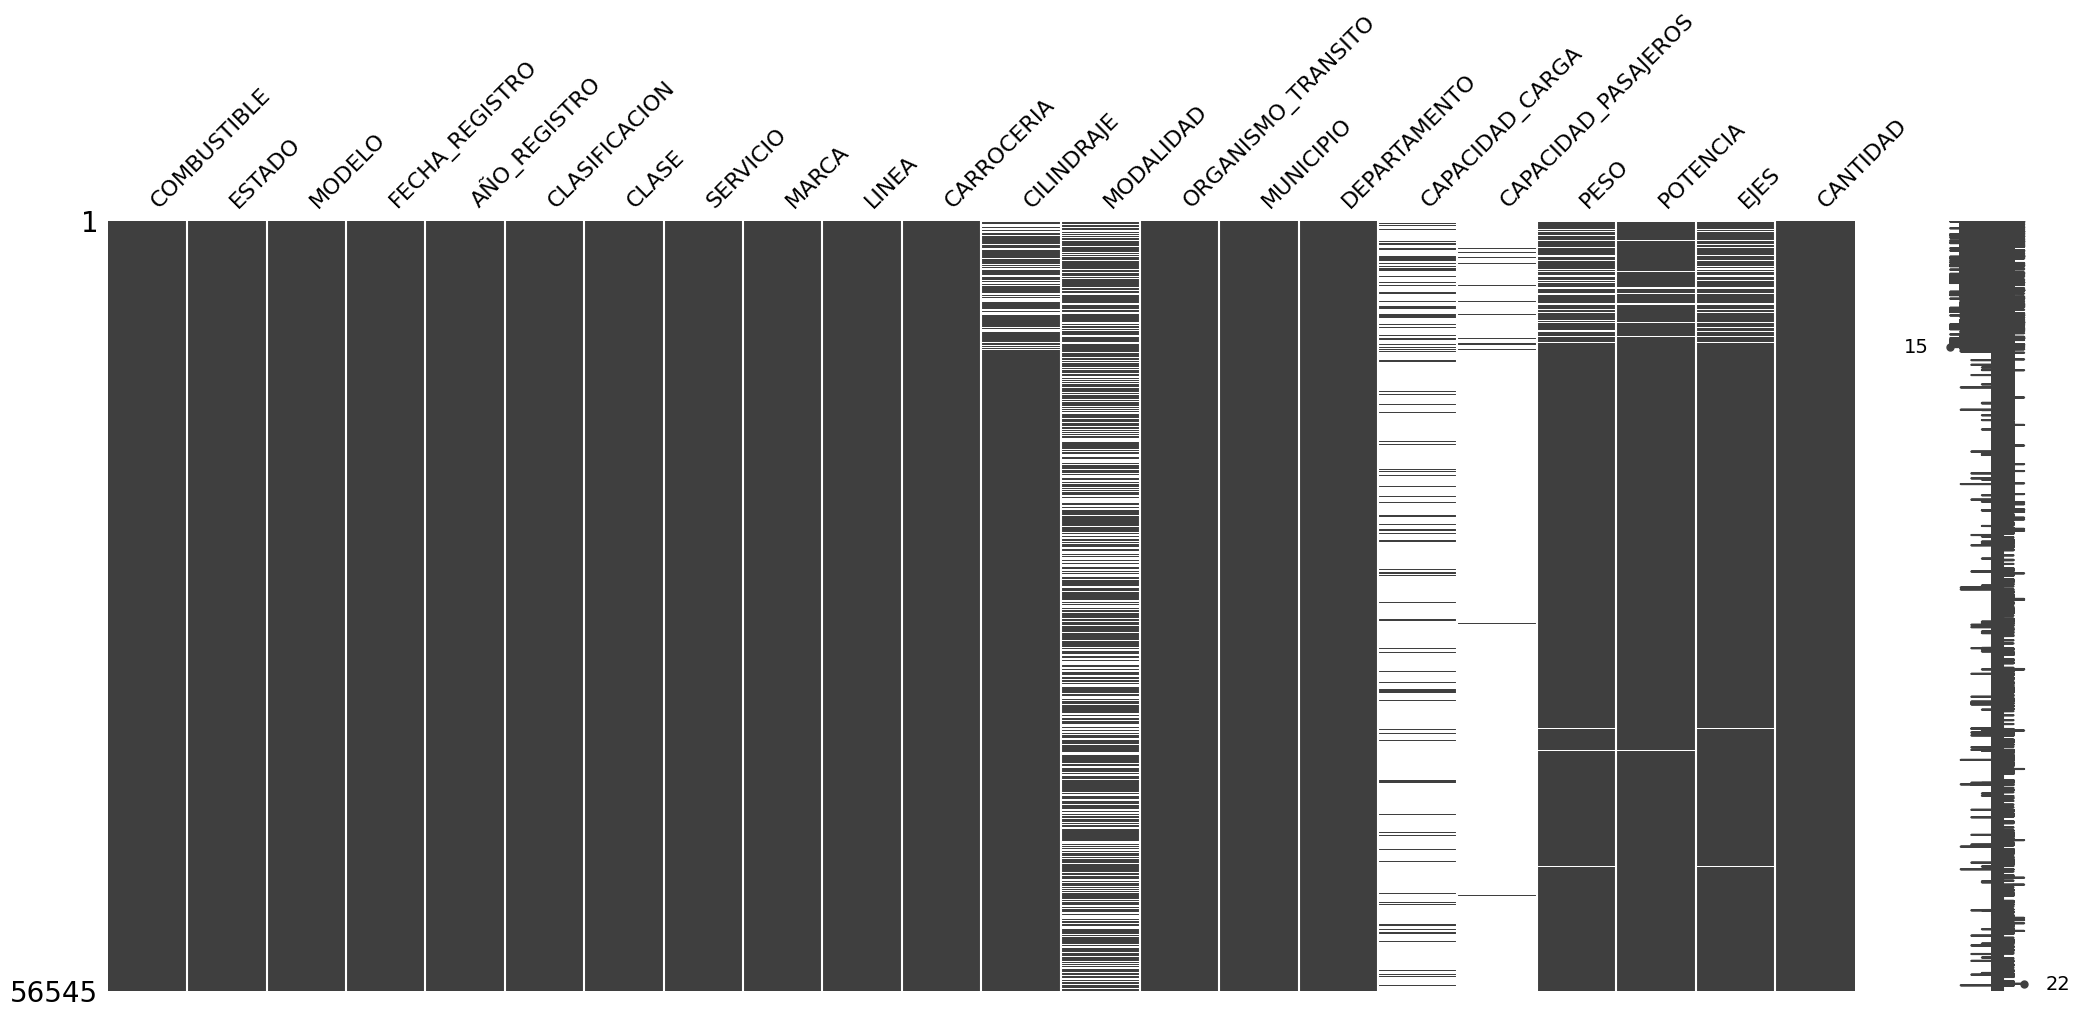

In [11]:
msno.matrix(df)
plt.show()

In [12]:
len(df["DEPARTAMENTO"].unique())

29

In [13]:
(df == 0).sum()

COMBUSTIBLE               0
ESTADO                    0
MODELO                    0
FECHA_REGISTRO            0
AÑO_REGISTRO              0
CLASIFICACION             0
CLASE                     0
SERVICIO                  0
MARCA                     0
LINEA                     0
CARROCERIA                0
CILINDRAJE             5120
MODALIDAD                 0
ORGANISMO_TRANSITO        0
MUNICIPIO                 0
DEPARTAMENTO              0
CAPACIDAD_CARGA        4318
CAPACIDAD_PASAJEROS     769
PESO                    478
POTENCIA                459
EJES                    561
CANTIDAD                  0
dtype: int64

In [14]:
df.columns

Index(['COMBUSTIBLE', 'ESTADO', 'MODELO', 'FECHA_REGISTRO', 'AÑO_REGISTRO',
       'CLASIFICACION', 'CLASE', 'SERVICIO', 'MARCA', 'LINEA', 'CARROCERIA',
       'CILINDRAJE', 'MODALIDAD', 'ORGANISMO_TRANSITO', 'MUNICIPIO',
       'DEPARTAMENTO', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO',
       'POTENCIA', 'EJES', 'CANTIDAD'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

In [16]:
df.drop(["AÑO_REGISTRO", "FECHA_REGISTRO", "MARCA", "LINEA", "MODALIDAD", "CAPACIDAD_CARGA", 
         "CAPACIDAD_PASAJEROS", "CANTIDAD", "ORGANISMO_TRANSITO", "MUNICIPIO", "CILINDRAJE"], axis=1, inplace=True)


Durante la limpieza de los datos se evidencia que los registros de clase motocicleta tienen una gran ausencia de valores. Los registros que sean de clase automovil, motocicleta, bus

In [17]:
clases_2_ejes = [
    "AUTOMOVIL", "CAMIONETA", "CAMPERO",
    "MOTOCICLETA", "TRICIMOTO", "MOTOCARRO", "CUADRICICLO", "BUS"
]

df.loc[(df["EJES"].isna() | (df["EJES"] == 0)) & (df["CLASE"].isin(clases_2_ejes)), "EJES"] = 2

In [18]:
df = df.dropna(subset=["EJES"]) # Borrar registros nulos en EJES

df = df[df["EJES"] != 0] # Borrar registros iguales a 0 en ejes

df.loc[(df["EJES"] == 21), "EJES"] = 2 #Corregir el registro de 2 automoviles que tienen 21 ejes

In [19]:
df = df.dropna(subset=["POTENCIA"])

df = df[df["POTENCIA"] != 0]

In [20]:
df = df.dropna(subset=["PESO"])
df = df[df["PESO"] != 0]

In [21]:
#df["FECHA_REGISTRO"] = pd.to_datetime(df["FECHA_REGISTRO"], errors="coerce")

In [22]:
#df["FECHA_REGISTRO"]

In [23]:
# df["COMBUSTIBLE"] = df["COMBUSTIBLE"].astype("category")
# df["ESTADO"] = df["ESTADO"].astype("category")
# df["MODELO"] = df["MODELO"].astype("category")
# df["CLASIFICACION"] = df["CLASIFICACION"].astype("category")
# df["CLASE"] = df["CLASE"].astype("category")
# df["SERVICIO"] = df["SERVICIO"].astype("category")
# df["CARROCERIA"] = df["CARROCERIA"].astype("category")
# df["DEPARTAMENTO"] = df["DEPARTAMENTO"].astype("category")
# df["EJES"] = df["EJES"].astype("category")

## Transformación de variables categoricas

In [24]:
#Label encoding para modelos de arboles
df_label_encoding = df.copy()

for col in list(df.select_dtypes(include=['object']).columns):
    df_label_encoding[col] = LabelEncoder().fit_transform(df_label_encoding[col])
    
x_categoricas = df_label_encoding[list(df.select_dtypes(include=['object']).columns)].drop("COMBUSTIBLE", axis=1)
y = df_label_encoding["COMBUSTIBLE"]

## Significancia de variables

In [25]:
chi2_scores, p_values = chi2(x_categoricas, y)

chi2_results = pd.DataFrame({
    "Variable": x_categoricas.columns,
    "Chi2_Score": chi2_scores,
    "p_value": p_values
})

print(chi2_results)

        Variable    Chi2_Score        p_value
0         ESTADO      6.815290   3.311910e-02
1  CLASIFICACION   3162.294718   0.000000e+00
2          CLASE    872.838585  2.920851e-190
3       SERVICIO    844.065905  5.169132e-184
4     CARROCERIA  37107.765959   0.000000e+00
5   DEPARTAMENTO   3029.942352   0.000000e+00


In [26]:
x_numericas = df[list(df.select_dtypes(include=['float64']).columns)]

anova = SelectKBest(score_func=f_classif, k='all')
anova.fit(x_numericas, y)
resultados = pd.DataFrame({
    'Variable': x_numericas.columns,
    'F-statistic': anova.scores_,
    'p-value': anova.pvalues_
})

resultados

,Variable,F-statistic,p-value
0,PESO,7116.881670,0.000000e+00
1,POTENCIA,181.557537,2.609938e-79
2,EJES,61.727505,1.670829e-27


In [27]:
# df.drop(["ESTADO", "EJES"], axis=1, inplace=True)
# df_label_encoding.drop(["ESTADO", "EJES"], axis=1, inplace=True)

## Correlación de variables predictoras

In [28]:
variables_categoricas_predictoras = list(list(df.select_dtypes(include=['object']).columns))


variables_categoricas_predictoras.remove("COMBUSTIBLE")
pares = list(combinations(variables_categoricas_predictoras, 2))
resultados_cramers = []
for col1, col2 in pares:
    tabla = pd.crosstab(df[col1], df[col2])
    chi2, p, _, _ = chi2_contingency(tabla)    
    n = tabla.sum().sum()
    r, k = tabla.shape
    resultados_cramers.append({
        'Variable 1': col1,
        'Variable 2': col2,
        'Cramérs V': np.sqrt(chi2 / (n * (min(r, k) - 1))),
        'Chi2': chi2,
        'Valor p' : p
    })

df_resultados = pd.DataFrame(resultados_cramers)
df_resultados

    

,Variable 1,Variable 2,Cramérs V,Chi2,Valor p
0,ESTADO,CLASIFICACION,0.000286,0.004369,9.978180e-01
1,ESTADO,CLASE,0.022624,27.417488,5.986784e-04
2,ESTADO,SERVICIO,0.001135,0.069034,9.660721e-01
3,ESTADO,CARROCERIA,0.022649,27.477919,6.479700e-01
4,ESTADO,DEPARTAMENTO,0.004676,1.171411,1.000000e+00
5,CLASIFICACION,CLASE,1.000000,107132.000000,0.000000e+00
6,CLASIFICACION,SERVICIO,0.134820,1947.267585,0.000000e+00
7,CLASIFICACION,CARROCERIA,0.470778,23743.856770,0.000000e+00
8,CLASIFICACION,DEPARTAMENTO,0.108582,1263.080698,8.882767e-229
9,CLASE,SERVICIO,0.609081,39743.780408,0.000000e+00


Se evidencia una gran correlacion entre algunas variables categoricas este analisis se hace a partir de la medicion de cramers V ya que chi2 y su valor p se pueden ver muy afectados en datasets grandes como el de este proyecto y tambien por la cantidad de categorias que tiene cada variable por eso con esta medicion identificamos las siguientes correlaciones fuertes

CLASIFICACION vs CLASE V=1.0 correlacion perfecta son redundantes

CLASE vs CARROCERIA V=0.725 muy fuerte probablemente porque el tipo de vehiculo determina la carroceria

SERVICIO vs CARROCERIA V=0.674 fuerte por ejemplo los vehiculos publicos tienen carrocerias especificas

CLASE vs SERVICIO V=0.609 fuerte ya que ciertas clases como los buses son mas comunes en el servicio publico

Se decidió eliminar algunas variables redundantes, específicamente CLASE y SERVICIO, ya que presentan una alta correlación con otras variables y aportan poca significancia para clasificar la variable dependiente COMBUSTIBLE en comparación con el resto de variables predictoras.

In [29]:
df.drop(["SERVICIO", "CLASE"], axis=1, inplace=True)
df_label_encoding.drop(["SERVICIO", "CLASE"], axis=1, inplace=True)

In [30]:
corr = df[["PESO", "POTENCIA", "EJES"]].corr(method="pearson")
corr

,PESO,POTENCIA,EJES
PESO,1.000000,0.418822,0.165671
POTENCIA,0.418822,1.000000,0.025078
EJES,0.165671,0.025078,1.000000


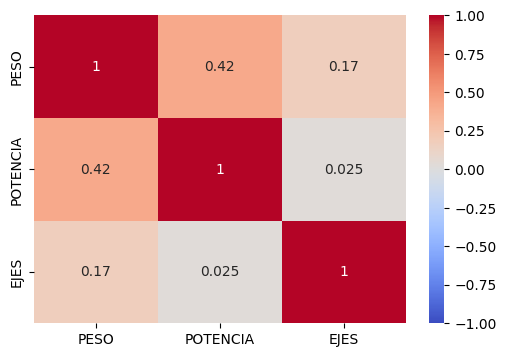

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

A partir del análisis de la matriz de correlación entre las variables numéricas, se observa que no existen relaciones lineales fuertes (todas las correlaciones son menores a 0.7), lo cual indica que no hay un problema de multicolinealidad considerable en el conjunto de datos. En particular, la relación entre peso y potencia presenta una correlación moderadas. Por lo tanto, se concluye que cada variable numérica aporta información diferenciada al modelo, razón por la cual ninguna debe ser eliminada en esta etapa del análisis.

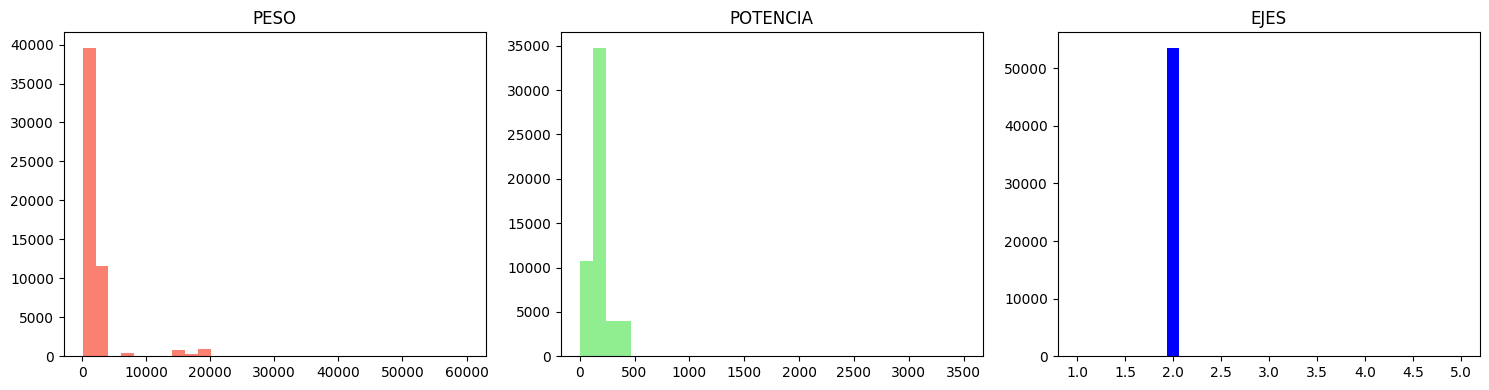

In [32]:

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  


# Histograma 2
axs[0].hist(df["PESO"], bins=30, color="salmon")
axs[0].set_title("PESO")

# Histograma 3
axs[1].hist(df["POTENCIA"], bins=30, color="lightgreen")
axs[1].set_title("POTENCIA")

axs[2].hist(df["EJES"], bins=30, color="blue")
axs[2].set_title("EJES")

plt.tight_layout()
plt.show()

In [33]:
resultados_shapiro = []
for col in ["PESO", "POTENCIA", "EJES"]:
    stat, p = shapiro(df[col].dropna())
    resultados_shapiro.append({
            'Variable': col,
            'Estadistico': stat,
            'Valor-p': p
    })
df_resultados = pd.DataFrame(resultados_shapiro)
df_resultados

C:\Users\Tomás Gómez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53566.
  res = hypotest_fun_out(*samples, **kwds)


,Variable,Estadistico,Valor-p
0,PESO,0.317572,1.832367e-153
1,POTENCIA,0.743308,6.223178e-124
2,EJES,0.006223,1.150383e-165


Al aplicar la prueba de Shapiro–Wilk para evaluar la normalidad de las variables numéricas, se plantea como hipótesis nula que los datos siguen una distribución normal. Sin embargo, en todos los casos los valores-p obtenidos son extremadamente pequeños (p < 0.05), lo que conduce a rechazar la hipótesis nula. Esto indica que las variables peso, potencia y  no se distribuyen normalmente, por lo que resulta más apropiado emplear medidas no paramétricas de correlación, como el coeficiente de Spearman, para identificar posibles relaciones monotónicas que el coeficiente de Pearson podría no reflejar de manera adecuada.

In [34]:
corr_spearman = df[["PESO", "POTENCIA", "EJES"]].corr(method="spearman")
corr_spearman

,PESO,POTENCIA,EJES
PESO,1.000000,0.731364,0.032014
POTENCIA,0.731364,1.000000,0.022799
EJES,0.032014,0.022799,1.000000


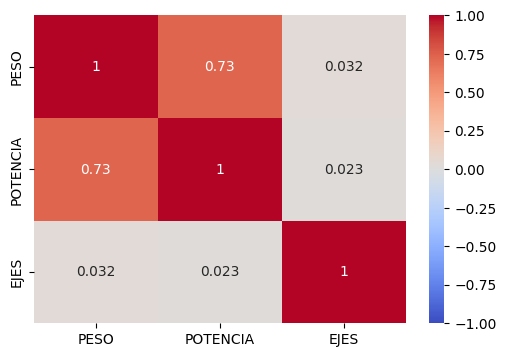

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

Los resultados de la correlación de Spearman muestran que existe una relación positiva. En particular, se observa que el peso y la potencia presentan una correlación fuerte (ρ = 0.73), lo cual tiene sentido desde el punto de vista técnico: a medida que los vehículos poseen mayor peso, requieren también de mayor potencia para su desplazamiento eficiente Por tal motivo se desea terminar de verificar la existencia de correlación entre las varaibles númericas empleando la evaluación del vif entre ellas.

In [36]:
# Agregar la constante (intercepto), necesario para calcular VIF
const = add_constant(df[["PESO", "POTENCIA", "EJES"]])

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = const.columns
vif_data["VIF"] = [variance_inflation_factor(const.values, i)
                   for i in range(const.shape[1])]

vif_data

,Variable,VIF
0,const,4600.665666
1,PESO,1.249226
2,POTENCIA,1.215703
3,EJES,1.030745


El análisis del VIF muestra que todas las variables presentan valores inferiores a 2, lo cual indica que no existe un problema de multicolinealidad en el modelo. Aunque el intercepto (const) muestra un valor elevado, este no se interpreta dentro del análisis, ya que no corresponde a una variable explicativa. En consecuencia, se puede concluir que tanto PESO, POTENCIA y EJES aportan información independiente y ninguna requiere ser eliminada del modelo.

Conclusión general de la correlación de las variables númericas

El estudio de correlaciones mediante Pearson y Spearman evidenció relaciones positivas entre las variables numéricas, especialmente entre PESO y POTENCIA, lo cual resulta coherente desde el punto de vista técnico, ya que a mayor peso del vehículo suele requerirse una mayor potencia. Sin embargo, el análisis de multicolinealidad mediante VIF confirmó que estas correlaciones no representan un problema estadístico, ya que los valores obtenidos se encuentran en rangos aceptables. En conjunto, los resultados permiten concluir que las variables analizadas pueden emplearse en el modelo sin riesgo de redundancia significativa.

In [37]:
x_label = df_label_encoding.drop('COMBUSTIBLE', axis = 1)
y_label = df_label_encoding['COMBUSTIBLE']
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2, random_state=42, stratify=y)

In [38]:
print(len(df[df["COMBUSTIBLE"] == "ELECTRICO"]))
print(len(df[df["COMBUSTIBLE"] == "GASO ELEC"]))
print(len(df[df["COMBUSTIBLE"] == "DIES ELEC"]))
print(df["COMBUSTIBLE"].unique())

6854
45379
1333
['ELECTRICO' 'GASO ELEC' 'DIES ELEC']


In [116]:
df['COMBUSTIBLE'].value_counts(normalize=True)

COMBUSTIBLE
GASO ELEC    0.847161
ELECTRICO    0.127954
DIES ELEC    0.024885
Name: proportion, dtype: float64

## Decision Tree

In [117]:
dt = DecisionTreeClassifier(max_depth=10, class_weight="balanced")
dt.fit(x_train, y_train)
dt_score = dt.score(x_test, y_test)

y_bar_dt_train = dt.predict(x_train)
y_bar_dt_test = dt.predict(x_test)

print(f'F1 score training set: {f1_score(y_train, y_bar_dt_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_dt_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_dt_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_dt_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_dt_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_dt_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_dt_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_dt_test, average="macro")}')

F1 score training set: 0.9940504505757634
F1 score testing set: 0.9950415266429607

Accuracy training set: 0.996686269018949
Accuracy testing set: 0.9974799327982079

Recall training set: 0.9983926457217316
Recall testing set: 0.9985955644621632

Precision training set: 0.989813415124449
Precision testing set: 0.9915436842975471


In [118]:
max_depth = np.arange(1, 45, 1) #Bucle manual para encontrar mejor profundidad
best_score = 0
best_model = None
for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train, y_train)
    dt_score = dt.score(x_test, y_test)
    
    if dt_score > best_score:
        best_score = dt_score
        best_model = dt 

y_bar_dt_train = best_model.predict(x_train)
y_bar_dt_test = best_model.predict(x_test)

#Segun un bucle manual la mejor profundidad es 4
print(f'Best max_depth value: {best_model.get_depth()}')

Best max_depth value: 17


In [119]:
print(f'F1 score training set: {f1_score(y_train, y_bar_dt_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_dt_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_dt_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_dt_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_dt_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_dt_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_dt_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_dt_test, average="macro")}')

F1 score training set: 0.9988770075564553
F1 score testing set: 0.9966146994525852

Accuracy training set: 0.9998366470643144
Accuracy testing set: 0.9993466492439799

Recall training set: 0.9999357261566996
Recall testing set: 0.9987108885316388

Precision training set: 0.997825411618515
Precision testing set: 0.9945558904189883


In [120]:
params = {
    "max_depth": max_depth,
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(dt, param_grid=params, cv=5)
grid_dt.fit(x_train, y_train)

y_bar_dt_train = grid_dt.predict(x_train)
y_bar_dt_test = grid_dt.predict(x_test)


#Segun grid la mejor profundidad es 17
print(f'Best max_depth value: {grid_dt.best_params_["max_depth"]}')
print(f'Best min_samples_split value: {grid_dt.best_params_["min_samples_split"]}')
print(f'Best min_samples_leaf value: {grid_dt.best_params_["min_samples_leaf"]}')
print(f'Best criterion value: {grid_dt.best_params_["criterion"]}')

Best max_depth value: 33
Best min_samples_split value: 2
Best min_samples_leaf value: 1
Best criterion value: entropy


In [121]:
print(f'F1 score training set: {f1_score(y_train, y_bar_dt_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_dt_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_dt_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_dt_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_dt_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_dt_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_dt_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_dt_test, average="macro")}')

F1 score training set: 0.9988770075564553
F1 score testing set: 0.9980888599233504

Accuracy training set: 0.9998366470643144
Accuracy testing set: 0.9995333208885571

Recall training set: 0.9999357261566996
Recall testing set: 0.9981918436834322

Precision training set: 0.997825411618515
Precision testing set: 0.9979859666297305


## Random Forest

In [122]:
rf = RandomForestClassifier(n_estimators=1, class_weight="balanced")
rf.fit(x_train, y_train)

y_bar_rf_train = rf.predict(x_train)
y_bar_rf_test = rf.predict(x_test)

print(f'F1 score training set: {f1_score(y_train, y_bar_rf_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_rf_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_rf_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_rf_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_rf_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_rf_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_rf_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_rf_test, average="macro")}')

F1 score training set: 0.9973359575604267
F1 score testing set: 0.997211841982803

Accuracy training set: 0.9994165966582657
Accuracy testing set: 0.9993466492439799

Recall training set: 0.9977883753498649
Recall testing set: 0.9985044838962595

Precision training set: 0.9968848491984331
Precision testing set: 0.9959421184002872


In [125]:
n_estimators = np.arange(1, 50, 1)
best_score = 0
best_model = None
best_n = 0

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, class_weight="balanced")
    rf.fit(x_train, y_train)
    rf_score = rf.score(x_test, y_test)
    
    if rf_score > best_score:
        best_score = rf_score
        best_model = rf
        best_n = i
        
y_bar_rf_train = best_model.predict(x_train)
y_bar_rf_test = best_model.predict(x_test)


print(f'Best n_estimators value: {best_n}')

Best n_estimators value: 38


In [126]:
print(f'F1 score training set: {f1_score(y_train, y_bar_rf_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_rf_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_rf_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_rf_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_rf_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_rf_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_rf_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_rf_test, average="macro")}')

F1 score training set: 0.9988770075564553
F1 score testing set: 0.9989751274372284

Accuracy training set: 0.9998366470643144
Accuracy testing set: 0.9997199925331343

Recall training set: 0.9999357261566996
Recall testing set: 0.9992706053975201

Precision training set: 0.997825411618515
Precision testing set: 0.9986827812907263


## Gradient Boosting

In [39]:
gb = GradientBoostingClassifier(learning_rate=0.1)
gb.fit(x_train, y_train)

y_bar_gb_train = gb.predict(x_train)
y_bar_gb_test = gb.predict(x_test)

print(f'F1 score training set: {f1_score(y_train, y_bar_gb_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_gb_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_gb_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_gb_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_gb_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_gb_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_gb_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_gb_test, average="macro")}')

F1 score training set: 0.9934310858841782
F1 score testing set: 0.9932745271512359

Accuracy training set: 0.9965229160832634
Accuracy testing set: 0.9963599029307448

Recall training set: 0.9909085620700101
Recall testing set: 0.9899253715219927

Precision training set: 0.9960424001094693
Precision testing set: 0.9967233918218225


In [129]:
#Bucle manual para encontrar el mejor valor de learning rate
learning_rate = (0.05, 0.1, 0.15, 0.2, 0.25, 0.3)
best_score = 0
best_model = None
best_n = 0

for i in learning_rate:
    gb = GradientBoostingClassifier(learning_rate=i)
    gb.fit(x_train, y_train)
    gb_score = dt.score(x_test, y_test)
    
    if gb_score > best_score:
        best_score = gb_score
        best_model = gb
        best_n = i
        
y_bar_gb_train = best_model.predict(x_train)
y_bar_gb_test = best_model.predict(x_test)


print(f'Best learning_rate value: {best_n}')

Best learning_rate value: 0.05


In [130]:
print(f'F1 score training set: {f1_score(y_train, y_bar_gb_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_gb_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_gb_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_gb_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_gb_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_gb_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_gb_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_gb_test, average="macro")}')

F1 score training set: 0.9865241119833629
F1 score testing set: 0.9880564613498487

Accuracy training set: 0.9923690842901148
Accuracy testing set: 0.9929998133283554

Recall training set: 0.9793769846482888
Recall testing set: 0.980966231656854

Precision training set: 0.9942136904559989
Precision testing set: 0.9956149289508911


In [134]:
params = {
    "n_estimators": [5, 10, 15, 20],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

gb = GradientBoostingClassifier()

grid_dt = GridSearchCV(gb, param_grid=params, cv=5)
grid_dt.fit(x_train, y_train)

y_bar_dt_train = grid_dt.predict(x_train)
y_bar_gb_test = grid_dt.predict(x_test)


#Segun grid la mejor profundidad es 8
print(f'Best n_estimators value: {grid_dt.best_params_["n_estimators"]}')
print(f'Best learning_rate value: {grid_dt.best_params_["learning_rate"]}')


Best n_estimators value: 20
Best learning_rate value: 0.2


In [135]:
print(f'F1 score training set: {f1_score(y_train, y_bar_gb_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_gb_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_gb_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_gb_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_gb_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_gb_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_gb_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_gb_test, average="macro")}')

F1 score training set: 0.9865241119833629
F1 score testing set: 0.985246743250889

Accuracy training set: 0.9923690842901148
Accuracy testing set: 0.9912264327048721

Recall training set: 0.9793769846482888
Recall testing set: 0.9761403278724351

Precision training set: 0.9942136904559989
Precision testing set: 0.9951459722684021


## One hot encoding

In [141]:
#OneHotEncoding para los demás modelos
df_one_hot_encoding = pd.get_dummies(df, columns=["ESTADO", "MODELO", "CLASIFICACION", "CARROCERIA", "DEPARTAMENTO"])
x_dummies = df_one_hot_encoding.drop(["COMBUSTIBLE"], axis=1)
y_label = df_label_encoding["COMBUSTIBLE"]


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y_label, test_size=0.2, random_state=42, stratify=y)

In [143]:
x_dummies

,PESO,POTENCIA,EJES,ESTADO_ACTIVO,ESTADO_REGISTRADO,MODELO_2000,MODELO_2004,MODELO_2005,MODELO_2010,MODELO_2011,MODELO_2012,MODELO_2013,MODELO_2014,MODELO_2015,MODELO_2016,MODELO_2017,MODELO_2018,MODELO_2019,MODELO_2020,MODELO_2021,MODELO_2022,MODELO_2023,CLASIFICACION_AUTOMOVIL,CLASIFICACION_MOTO,CLASIFICACION_MOTOCARRO,CARROCERIA_ARTICULADO,CARROCERIA_CABINADO,CARROCERIA_CARPADO,CARROCERIA_CERRADA,CARROCERIA_COMPACTADOR DE BASURAS,CARROCERIA_CONVERTIBLE,CARROCERIA_COUPE,CARROCERIA_DOBLE CABINA,CARROCERIA_DOBLE CABINA CON PLATON,CARROCERIA_EQUIPO ESPECIAL DEL SECTOR PETROLERO,CARROCERIA_ESTACAS,CARROCERIA_ESTIBAS,CARROCERIA_FURGON,CARROCERIA_GRUA,CARROCERIA_HATCH BACK,CARROCERIA_MEZCLADOR,CARROCERIA_PANEL,CARROCERIA_PICO,CARROCERIA_PICO (PICK UP),CARROCERIA_PLANCHON - PLATAFORMA,CARROCERIA_PLATAFORMA,CARROCERIA_PLATON,CARROCERIA_RECOLECTOR,CARROCERIA_REPARTO Ó PALET,CARROCERIA_REPARTO ó PALET,CARROCERIA_SEDAN,CARROCERIA_SEMICERRADA,CARROCERIA_SIN CARROCERIA,CARROCERIA_TALADRO,CARROCERIA_TANQUE,CARROCERIA_VAN,CARROCERIA_WAGON,DEPARTAMENTO_Amazonas,DEPARTAMENTO_Antioquia,DEPARTAMENTO_Arauca,"DEPARTAMENTO_Archipielago de San Andres, Providencia",DEPARTAMENTO_Atlantico,DEPARTAMENTO_Bogota D.C.,DEPARTAMENTO_Bolivar,DEPARTAMENTO_Boyaca,DEPARTAMENTO_Caldas,DEPARTAMENTO_Caqueta,DEPARTAMENTO_Casanare,DEPARTAMENTO_Cauca,DEPARTAMENTO_Cesar,DEPARTAMENTO_Choco,DEPARTAMENTO_Cordoba,DEPARTAMENTO_Cundinamarca,DEPARTAMENTO_Huila,DEPARTAMENTO_La Guajira,DEPARTAMENTO_Magdalena,DEPARTAMENTO_Meta,DEPARTAMENTO_Narino,DEPARTAMENTO_Norte de Santander,DEPARTAMENTO_Quindio,DEPARTAMENTO_Risaralda,DEPARTAMENTO_Santander,DEPARTAMENTO_Sucre,DEPARTAMENTO_Tolima,DEPARTAMENTO_Valle del Cauca
0,20000.0,402.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1980.0,134.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,2550.0,80.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,2120.0,161.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5,1440.0,184.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fa

## KNN

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

y_bar_knn_train = knn.predict(x_train)
y_bar_knn_test = knn.predict(x_test)

print(f'F1 score training set: {f1_score(y_train, y_bar_knn_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_knn_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_knn_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_knn_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_knn_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_knn_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_knn_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_knn_test, average="macro")}')

F1 score training set: 0.9943297834715357
F1 score testing set: 0.9964087519770038

Accuracy training set: 0.9985064874451601
Accuracy testing set: 0.9984132910210939

Recall training set: 0.994835017606353
Recall testing set: 0.9963062884504087

Precision training set: 0.993825493446676
Precision testing set: 0.9965113057087991


In [ ]:
n_neighbors = np.arange(1, 20, 1)
best_model = None
best_score = 0
best_n = 0
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_score = knn.score(x_test, y_test)
    
    if knn_score > best_score:
        best_score = knn_score
        best_model = knn
        best_n = i

y_bar_knn_train = best_model.predict(x_train)
y_bar_knn_test = best_model.predict(x_test)


print(f'Best n_neighbors value: {best_n}')

Best n_neighbors value: 1


In [ ]:
print(f'F1 score training set: {f1_score(y_train, y_bar_knn_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_knn_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_knn_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_knn_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_knn_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_knn_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_knn_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_knn_test, average="macro")}')

F1 score training set: 0.9988770075564553
F1 score testing set: 0.9991154510452436

Accuracy training set: 0.9998366470643144
Accuracy testing set: 0.9998133283554228

Recall training set: 0.9999357261566996
Recall testing set: 0.9997201415670594

Precision training set: 0.997825411618515
Precision testing set: 0.9985130873713127


## Regresión logística

In [144]:
# Regresion Logistica
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=42)
lr.fit(x_train, y_train)

y_bar_lr_train = lr.predict(x_train)
y_bar_lr_test = lr.predict(x_test)

print(f'F1 score training set: {f1_score(y_train, y_bar_lr_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_lr_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_lr_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_lr_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_lr_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_lr_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_lr_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_lr_test, average="macro")}')

C:\Users\Tomás Gómez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


F1 score training set: 0.82078153308806
F1 score testing set: 0.8126865606007089

Accuracy training set: 0.9426864557080183
Accuracy testing set: 0.9425051334702259

Recall training set: 0.7683202994908976
Recall testing set: 0.7648211522082157

Precision training set: 0.8931800530498286
Precision testing set: 0.8771229640922483


C:\Users\Tomás Gómez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_model = None
best_score = 0
best_c = 0
for i in n_neighbors:
    lr = LogisticRegression(C=i, multi_class='multinomial', solver='lbfgs', max_iter=10000)
    lr.fit(x_train, y_train)
    lr_score = lr.score(x_test, y_test)
    
    if lr_score > best_score:
        best_score = lr_score
        best_model = lr
        best_c = i

y_bar_lr_train = lr.predict(x_train)
y_bar_lr_test = lr.predict(x_test)


print(f'Best C value: {best_c}')

C:\Users\Tomás Gómez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Tomás Gómez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Tomás Gómez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was de

Best C value: 3


In [ ]:
print(f'F1 score training set: {f1_score(y_train, y_bar_lr_train, average="macro")}')
print(f'F1 score testing set: {f1_score(y_test, y_bar_lr_test, average="macro")}\n')

print(f'Accuracy training set: {accuracy_score(y_train, y_bar_lr_train)}')
print(f'Accuracy testing set: {accuracy_score(y_test, y_bar_lr_test)}\n')

print(f'Recall training set: {recall_score(y_train, y_bar_lr_train, average="macro")}')
print(f'Recall testing set: {recall_score(y_test, y_bar_lr_test, average="macro")}\n')

print(f'Precision training set: {precision_score(y_train, y_bar_lr_train, average="macro")}')
print(f'Precision testing set: {precision_score(y_test, y_bar_lr_test, average="macro")}')



F1 score training set: 0.5971615864709191
F1 score testing set: 0.6029065230446546

Accuracy training set: 0.8919303649771306
Accuracy testing set: 0.8930371476572708

Recall training set: 0.5265655468867347
Recall testing set: 0.5303773926077565

Precision training set: 0.8201882183284072
Precision testing set: 0.8336734798286072
